In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config, parse_models_config

analysis_dir = os.path.abspath(os.path.join('', os.pardir))
root_dir = os.path.abspath(os.path.join(analysis_dir, os.pardir))
root_dir

ml_dir: /home/lorenzo/Desktop/research-projects/mimic-2/src/ml | src_dir: /home/lorenzo/Desktop/research-projects/mimic-2/src | entry_dir: /home/lorenzo/Desktop/research-projects/mimic-2 




'/home/lorenzo/Desktop/research-projects/mimic-2'

In [54]:
# Get model
log_dir_path = os.path.join(root_dir, 'log')
mab_dir_path = os.path.join(log_dir_path, 'mab')
config_dir_path = os.path.join(mab_dir_path, 'config')
import os
import json


# Define a dictionary to store the model names and their corresponding timestamps
models_dict = {}

# Loop through all the JSON files in the folder
for filename in os.listdir(config_dir_path):
    if filename.endswith(".json"):
        # Extract the model name from the filename
        model_name = filename.split(".")[0]

        # Open the JSON file and extract the timestamp for each run
        with open(os.path.join(config_dir_path, filename), "r") as f:
            data = json.load(f)
            runs = data["runs"]
            for run in runs:
                
                trace = run["trace"]
                timestamp = run["timestamp"]
                path = run["path"]

                # Check if the model name and trace already exist in the dictionary
                key = (model_name, trace)
                if key in models_dict:
                    # If they exist, compare the timestamps and update the dictionary if the current timestamp is more recent
                    if timestamp > models_dict[key]:
                        models_dict[key] = path
                else:
                    # If they don't exist, add them to the dictionary
                    models_dict[key] = path



In [57]:
def get_filename(models_dict, model_name, trace):
   for key, path in models_dict.items():
    if model_name == key[0] and trace == key[1]:
        return path
    return None

In [58]:
filename = get_filename(models_dict, "adaptive_greedy_threshold", "att.lte.driving")
if filename:
    print(filename)
else:
    print("File not found.")


/home/lorenzo/Desktop/research-projects/mimic-2/log/mab/history/adaptive_greedy_threshold.2023.03.22.14.39.27.2023.03.22.14.39.27.json


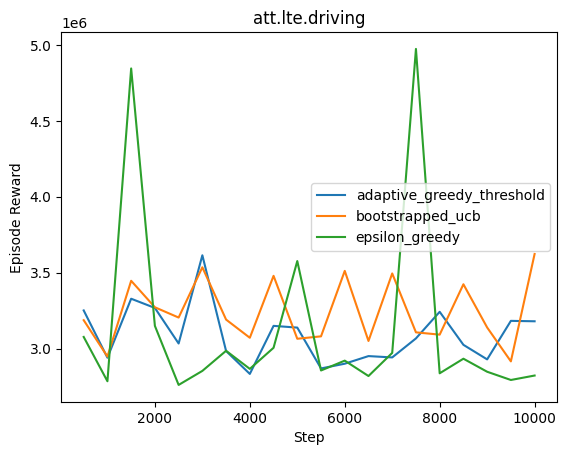

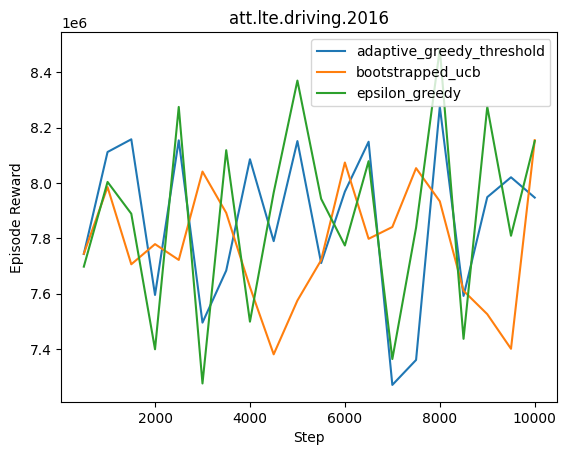

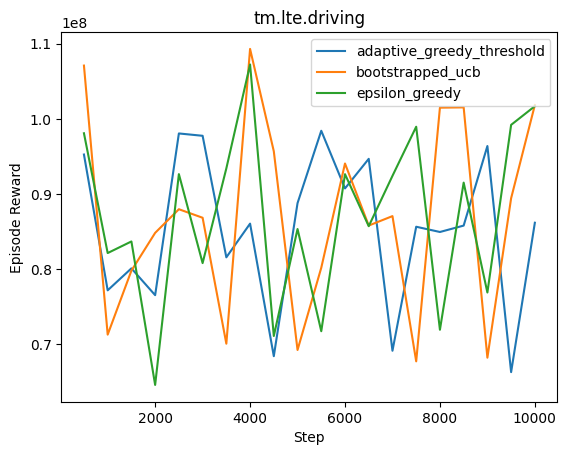

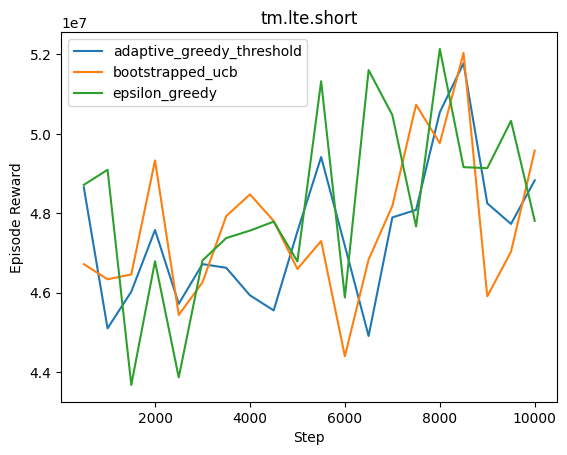

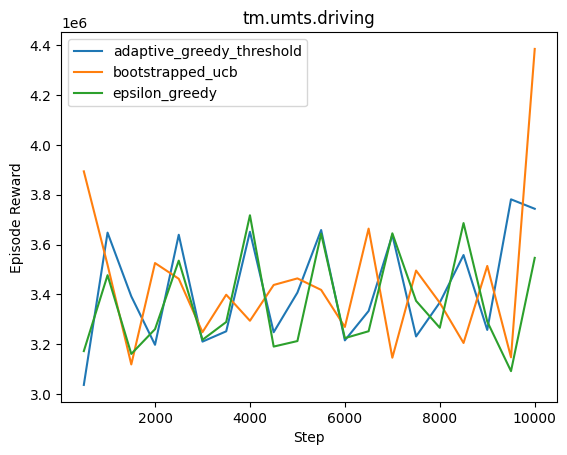

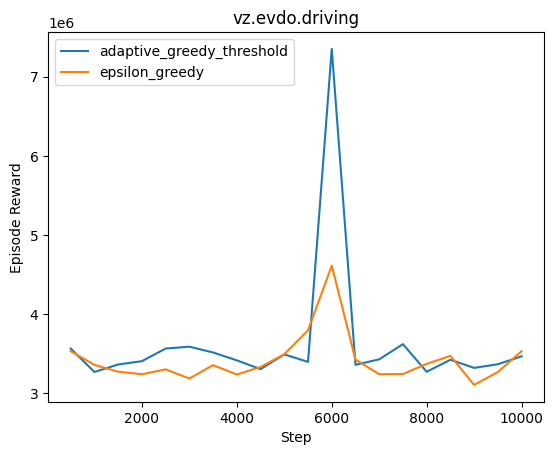

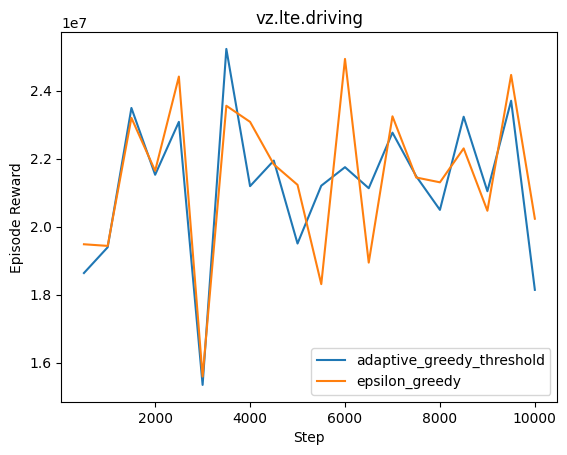

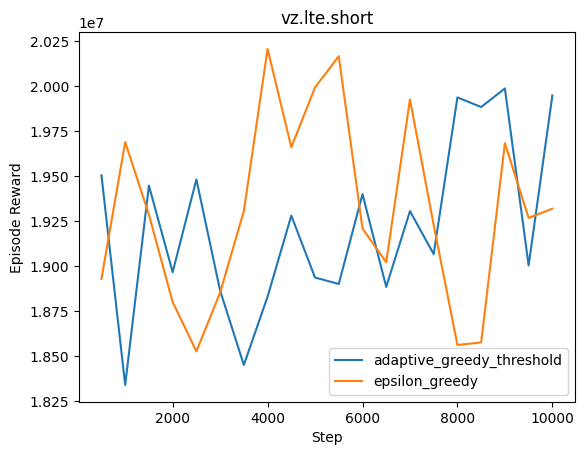

In [79]:
import matplotlib.pyplot as plt

from collections import defaultdict


# Group entries by trace key
grouped_dict = defaultdict(list)
for key, value in models_dict.items():
    trace_key = key[1]
    grouped_dict[trace_key].append(value)

# Loop over traces and plot episode reward for each model
for trace_key, file_paths in grouped_dict.items():
    fig, ax = plt.subplots()
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            data = json.load(f)
            model_name = file_path.split('/')[-1].split('.')[0]
            episode_rewards = data['episode_reward']
            steps =  data["nb_steps"]
            ax.plot(steps, episode_rewards, label=model_name)
    ax.set_xlabel('Step')
    ax.set_ylabel('Episode Reward')
    ax.set_title(trace_key)
    ax.legend()
    plt.show()
